<a href="https://colab.research.google.com/github/venkatarajunesha360/Basic-DL/blob/main/c1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt


In [ ]:
print(tf.config.experimental.list_physical_devices())

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
tf.test.is_built_with_cuda()

True

In [ ]:
(x_train,y_train), (x_test,y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
x_train.shape, y_train.shape

((50000, 32, 32, 3), (50000, 1))

In [ ]:
x_test.shape, y_test.shape

((10000, 32, 32, 3), (10000, 1))

array([[[154, 177, 187],
        [126, 137, 136],
        [105, 104,  95],
        ...,
        [ 91,  95,  71],
        [ 87,  90,  71],
        [ 79,  81,  70]],

       [[140, 160, 169],
        [145, 153, 154],
        [125, 125, 118],
        ...,
        [ 96,  99,  78],
        [ 77,  80,  62],
        [ 71,  73,  61]],

       [[140, 155, 164],
        [139, 146, 149],
        [115, 115, 112],
        ...,
        [ 79,  82,  64],
        [ 68,  70,  55],
        [ 67,  69,  55]],

       ...,

       [[175, 167, 166],
        [156, 154, 160],
        [154, 160, 170],
        ...,
        [ 42,  34,  36],
        [ 61,  53,  57],
        [ 93,  83,  91]],

       [[165, 154, 128],
        [156, 152, 130],
        [159, 161, 142],
        ...,
        [103,  93,  96],
        [123, 114, 120],
        [131, 121, 131]],

       [[163, 148, 120],
        [158, 148, 122],
        [163, 156, 133],
        ...,
        [143, 133, 139],
        [143, 134, 142],
        [143, 133, 144]]], dtype=uint8)
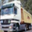

In [ ]:
x_train[1]

In [ ]:
y_train[1]

array([9], dtype=uint8)

In [ ]:
names=["airplane","auto mobile", "bird" , "cat", "deer", "dog", "frog", "horse", "ship", "truck" ]


In [ ]:
names[y_train[1][0]]

'truck'

In [ ]:
y_train_categorical =tf.keras.utils.to_categorical(
    y_train, num_classes=10, dtype='float32'
)

y_train_categorical[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
y_test_categorical =tf.keras.utils.to_categorical(
    y_test, num_classes=10, dtype='float32'
)


In [ ]:
x_train_scaled = x_train/255
x_test_scaled = x_test/255

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000, activation='relu'),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

In [ ]:
model.compile(
      optimizer='Adam',
      loss='categorical_crossentropy',
      metrics=['accuracy']
)

In [ ]:
model.fit(x_train_scaled, y_train_categorical, epochs=50)

Epoch 1/50
1563/1563 [==============================] - 10s 6ms/step - loss: 1.8892 - accuracy: 0.3286
Epoch 2/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.6564 - accuracy: 0.4047
Epoch 3/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.5723 - accuracy: 0.4368
Epoch 4/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.5269 - accuracy: 0.4532
Epoch 5/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4910 - accuracy: 0.4683
Epoch 6/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4623 - accuracy: 0.4753
Epoch 7/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4383 - accuracy: 0.4846
Epoch 8/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4087 - accuracy: 0.4970
Epoch 9/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.3885 - accuracy: 0.5033
Epoch 10/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.36

In [ ]:
names[np.argmax(model.predict(x_test_scaled)[23])]

313/313 [==============================] - 1s 2ms/step


'truck'

In [ ]:
names[y_test[23][0]]

'truck'